In [1]:
import csv
import numpy
from matplotlib import pyplot
from typing import Dict
import matplotlib
pyplot.rcParams['font.family'] = 'IPAGothic'
    
csv_data = [row for row in csv.reader(open('./npb.csv'))]

keys = csv_data[0][1:]
csv_data = csv_data[1:]
print(keys)


['打率', '安打', '本塁打', '塁打', '打点', '盗塁', '四球']


In [2]:
dict_data: dict = {}
for row in csv_data:
    name = row[0]
    datas = row[1:]
    dict_data[name] = {'value': {}, 'order': {}}
    for (k, d) in zip(keys, datas):
        try:
            dict_data[name]['value'][k] = int(d)
        except:
            try:
                dict_data[name]['value'][k] = float(d)
            except:
                pass
for data in dict_data.values():
    print(data)

{'value': {'打率': 0.385, '安打': 55, '本塁打': 10, '塁打': 95, '打点': 30, '盗塁': 0, '四球': 20}, 'order': {}}
{'value': {'打率': 0.351, '安打': 68, '本塁打': 3, '塁打': 99, '打点': 23, '盗塁': 4, '四球': 12}, 'order': {}}
{'value': {'打率': 0.349, '安打': 58, '本塁打': 3, '塁打': 80, '打点': 22, '盗塁': 2, '四球': 13}, 'order': {}}
{'value': {'打率': 0.339, '安打': 58, '本塁打': 5, '塁打': 91, '打点': 27, '盗塁': 0, '四球': 11}, 'order': {}}
{'value': {'打率': 0.326, '安打': 63, '本塁打': 3, '塁打': 98, '打点': 26, '盗塁': 8, '四球': 31}, 'order': {}}
{'value': {'打率': 0.323, '安打': 53, '本塁打': 2, '塁打': 74, '打点': 15, '盗塁': 2, '四球': 4}, 'order': {}}
{'value': {'打率': 0.321, '安打': 59, '本塁打': 12, '塁打': 105, '打点': 29, '盗塁': 0, '四球': 21}, 'order': {}}
{'value': {'打率': 0.306, '安打': 57, '本塁打': 1, '塁打': 70, '打点': 22, '盗塁': 5, '四球': 25}, 'order': {}}
{'value': {'打率': 0.301, '安打': 56, '本塁打': 6, '塁打': 83, '打点': 20, '盗塁': 6, '四球': 10}, 'order': {}}
{'value': {'打率': 0.299, '安打': 52, '本塁打': 5, '塁打': 78, '打点': 29, '盗塁': 0, '四球': 30}, 'order': {}}
{'value': {'打率': 0.298, '安打'

In [3]:
for key in keys:
    order_list: list[Dict[str, str|int|float]] = []
    for name, data in dict_data.items():
        order_list.append({'name': name, 'value': data['value'][key]})
    order_list.sort(key=lambda x: x['value'], reverse=True)
    # rint(order_list)

    for i, value in enumerate(order_list):
        dict_data[value['name']]['order'][key] = i
for data in dict_data.values():
    print(data)

{'value': {'打率': 0.385, '安打': 55, '本塁打': 10, '塁打': 95, '打点': 30, '盗塁': 0, '四球': 20}, 'order': {'打率': 0, '安打': 9, '本塁打': 1, '塁打': 3, '打点': 1, '盗塁': 18, '四球': 7}}
{'value': {'打率': 0.351, '安打': 68, '本塁打': 3, '塁打': 99, '打点': 23, '盗塁': 4, '四球': 12}, 'order': {'打率': 1, '安打': 0, '本塁打': 18, '塁打': 1, '打点': 10, '盗塁': 5, '四球': 16}}
{'value': {'打率': 0.349, '安打': 58, '本塁打': 3, '塁打': 80, '打点': 22, '盗塁': 2, '四球': 13}, 'order': {'打率': 2, '安打': 3, '本塁打': 19, '塁打': 8, '打点': 13, '盗塁': 6, '四球': 15}}
{'value': {'打率': 0.339, '安打': 58, '本塁打': 5, '塁打': 91, '打点': 27, '盗塁': 0, '四球': 11}, 'order': {'打率': 3, '安打': 4, '本塁打': 10, '塁打': 4, '打点': 6, '盗塁': 19, '四球': 20}}
{'value': {'打率': 0.326, '安打': 63, '本塁打': 3, '塁打': 98, '打点': 26, '盗塁': 8, '四球': 31}, 'order': {'打率': 4, '安打': 1, '本塁打': 20, '塁打': 2, '打点': 7, '盗塁': 0, '四球': 1}}
{'value': {'打率': 0.323, '安打': 53, '本塁打': 2, '塁打': 74, '打点': 15, '盗塁': 2, '四球': 4}, 'order': {'打率': 5, '安打': 10, '本塁打': 22, '塁打': 15, '打点': 21, '盗塁': 7, '四球': 28}}
{'value': {'打率': 0.321, '安打': 

In [4]:
normalizing_dict: Dict[str, Dict[str, float]] = {}

for key in keys:
    normalizing_dict[key] = {}
    tmp_list: list[float] = [data['value'][key] for data in dict_data.values()]
    normalizing_dict[key]['offset'] = min(tmp_list)
    normalizing_dict[key]['range'] = max(tmp_list) - min(tmp_list)

print(normalizing_dict)

{'打率': {'offset': 0, 'range': 0.385}, '安打': {'offset': 0, 'range': 68}, '本塁打': {'offset': 0, 'range': 12}, '塁打': {'offset': 0, 'range': 105}, '打点': {'offset': 0, 'range': 34}, '盗塁': {'offset': 0, 'range': 8}, '四球': {'offset': 0, 'range': 34}}


In [5]:
tmp_dict = {}
for key in keys:
    value_list: list[int|float] = [value['value'][key] for value in dict_data.values()]
    tmp_dict[key] = sum(value_list) / len(value_list)
dict_data['平均'] = {}
dict_data['平均']['value'] = tmp_dict

for value in dict_data.values():
    print(value)

{'value': {'打率': 0.385, '安打': 55, '本塁打': 10, '塁打': 95, '打点': 30, '盗塁': 0, '四球': 20}, 'order': {'打率': 0, '安打': 9, '本塁打': 1, '塁打': 3, '打点': 1, '盗塁': 18, '四球': 7}}
{'value': {'打率': 0.351, '安打': 68, '本塁打': 3, '塁打': 99, '打点': 23, '盗塁': 4, '四球': 12}, 'order': {'打率': 1, '安打': 0, '本塁打': 18, '塁打': 1, '打点': 10, '盗塁': 5, '四球': 16}}
{'value': {'打率': 0.349, '安打': 58, '本塁打': 3, '塁打': 80, '打点': 22, '盗塁': 2, '四球': 13}, 'order': {'打率': 2, '安打': 3, '本塁打': 19, '塁打': 8, '打点': 13, '盗塁': 6, '四球': 15}}
{'value': {'打率': 0.339, '安打': 58, '本塁打': 5, '塁打': 91, '打点': 27, '盗塁': 0, '四球': 11}, 'order': {'打率': 3, '安打': 4, '本塁打': 10, '塁打': 4, '打点': 6, '盗塁': 19, '四球': 20}}
{'value': {'打率': 0.326, '安打': 63, '本塁打': 3, '塁打': 98, '打点': 26, '盗塁': 8, '四球': 31}, 'order': {'打率': 4, '安打': 1, '本塁打': 20, '塁打': 2, '打点': 7, '盗塁': 0, '四球': 1}}
{'value': {'打率': 0.323, '安打': 53, '本塁打': 2, '塁打': 74, '打点': 15, '盗塁': 2, '四球': 4}, 'order': {'打率': 5, '安打': 10, '本塁打': 22, '塁打': 15, '打点': 21, '盗塁': 7, '四球': 28}}
{'value': {'打率': 0.321, '安打': 

In [6]:
print([k for k in dict_data.keys()])

['宮﨑 敏郎(デ)', '秋山 翔吾(広)', '関根 大気(デ)', '細川 成也(中)', '近本 光司(神)', '桑原 将志(デ)', '岡本 和真(巨)', '中野 拓夢(神)', '西川 龍馬(広)', '大山 悠輔(神)', '菊池 涼介(広)', '木浪 聖也(神)', '福永 裕基(中)', '岡林 勇希(中)', '牧 秀悟(デ)', 'サンタナ(ヤ)', '大島 洋平(中)', '大城 卓三(巨)', '坂倉 将吾(広)', 'オスナ(ヤ)', 'ノイジー(神)', '佐野 恵太(デ)', '坂本 勇人(巨)', '石川 昂弥(中)', '佐藤 輝明(神)', '木下 拓哉(中)', '丸 佳浩(巨)', '村上 宗隆(ヤ)', 'マクブルーム(広)', '長岡 秀樹(ヤ)', '平均']


In [9]:
name = '近本 光司(神)'

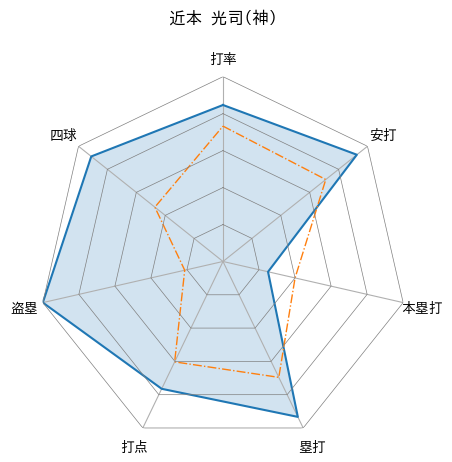

In [10]:
dict: dict = dict_data[name]['value']

values = \
    [((value - normalizer['offset']) / normalizer['range'])
     for value, normalizer
     in zip(dict.values(), normalizing_dict.values())]
average = \
    [((value - normalizer['offset']) / normalizer['range'])
     for value, normalizer
     in zip(dict_data['平均']['value'].values(), normalizing_dict.values())]
# print(values)

labels = [k for k in dict.keys()]

# 多角形を閉じるためにデータの最後に最初の値を追加する。
radar_values = numpy.concatenate([values, [values[0]]])
radar_average = numpy.concatenate([average, [average[0]]])
# プロットする角度を生成する。
angles = numpy.linspace(0, 2 * numpy.pi, len(labels) + 1, endpoint=True)
# メモリ軸の生成
rgrids = [0, 0.2, 0.4, 0.6, 0.8, 1.0]


fig = pyplot.figure(facecolor="w")
# 極座標でaxを作成
ax = fig.add_subplot(1, 1, 1, polar=True)
# レーダーチャートの線を引く
ax.plot(angles, radar_values)
ax.plot(angles, radar_average, linestyle="dashdot", linewidth=1)
#　レーダーチャートの内側を塗りつぶす
ax.fill(angles, radar_values, alpha=0.2)
# 項目ラベルの表示
ax.set_thetagrids(angles[:-1] * 180 / numpy.pi, labels)
# 円形の目盛線を消す
ax.set_rgrids([])
# 一番外側の円を消す
ax.spines['polar'].set_visible(False)
# 始点を上(北)に変更
ax.set_theta_zero_location("N")
# 時計回りに変更(デフォルトの逆回り)
ax.set_theta_direction(-1)

# 多角形の目盛線を引く
for grid_value in rgrids:
    grid_values = [grid_value] * (len(labels)+1)
    ax.plot(angles, grid_values, color="gray",  linewidth=0.5)

# # メモリの値を表示する
# for t in rgrids:
#     # xが偏角、yが絶対値でテキストの表示場所が指定される
#     ax.text(x=0, y=t, s=t)

# rの範囲を指定
ax.set_rlim([min(rgrids), max(rgrids)])

ax.set_title(name, pad=20)
pyplot.show()